***Denoising Convolutional Autoencoder***

https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


**Import dataset** (MNIST), generate noisy versions

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

max_value = float(X_train.max())
X_train = X_train.astype("float32")/max_value
X_test = X_test.astype("float32")/max_value

X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

np.random.seed(77)

X_train_noisy = X_train + np.random.normal(loc = 0.0, scale = 0.5, size = X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)

X_test_noisy = X_test + np.random.normal(loc = 0.0, scale = 0.5, size = X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Build model**

In [ ]:
autoencoder = Sequential()

# Encoder layers
autoencoder.add(Conv2D(32, (3, 3), activation = "relu", padding = "same",
    input_shape = X_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding = "same"))
autoencoder.add(Conv2D(32, (3, 3), activation = "relu", padding = "same"))
autoencoder.add(MaxPooling2D((2, 2), padding = "same"))

# Decoder layers
autoencoder.add(Conv2D(32, (3, 3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation = "sigmoid", padding = "same"))

autoencoder.summary()

**Train model**

In [ ]:
autoencoder.compile(
    optimizer = "adam",
    loss = "binary_crossentropy")

start_time = time.time()

epochs = 2

autoencoder.fit(
    X_train_noisy, X_train,
    epochs = epochs,
    batch_size = 128,
    validation_data = (X_test_noisy, X_test),
    callbacks = [PlotLossesKeras()])

end_time = time.time() - start_time
print(f"Training time: {end_time} seconds for {epochs} epochs")
print(f"Training time: {end_time/epochs} per epoch on average")

**Save model**

In [ ]:
autoencoder.save("Models/denoise_conv_autoencoder.model")

**Load model**

In [3]:
autoencoder = load_model("Models/denoise_conv_autoencoder.model")

**Display output**

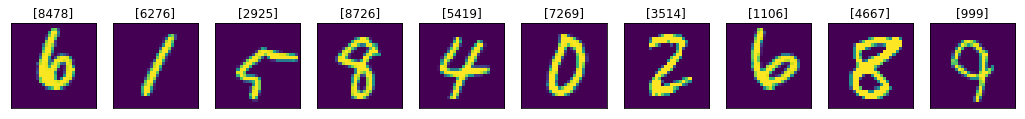

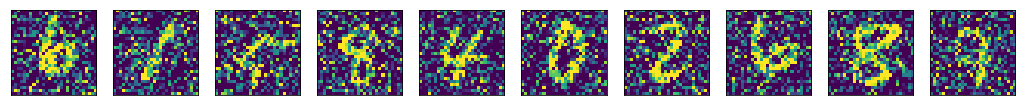

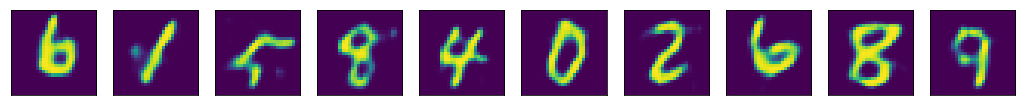

In [20]:
n = 10
np.random.seed(89)
choice = [np.random.randint(0, len(X_test)) for _ in range(n)]

X_test_denoised = autoencoder.predict(X_test_noisy)

for arr in [X_test, X_test_noisy, X_test_denoised]:
    plt.figure(figsize = (18, 4))
    for i in range(n):
        j = choice[i]
        ax = plt.subplot(1, n, i+1)
        if arr is X_test:
            ax.set_title(f"[{j}]")
        plt.imshow(arr[j].reshape(28, 28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

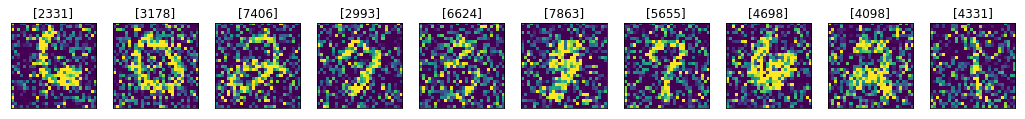

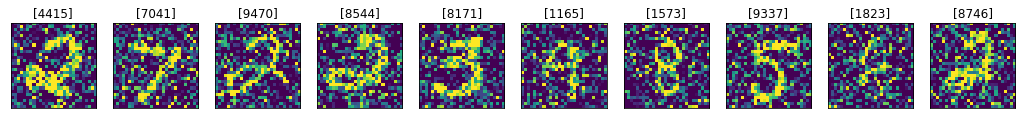

In [21]:
n = 10
seed = lambda k: int(99/(2*k+1)*13) # arbitrary mapping from k to some seed

# k rows of images
for k in range(2):
    np.random.seed(seed(k))
    plt.figure(figsize = (18, 4))
    for i in range(n):
        j = np.random.randint(0, len(X_test))
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X_test_noisy[j].reshape(28, 28))
        ax.set_title(f"[{j}]")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()